<!DOCTYPE html>
<html>

<body>
    <h1>Customer Clustering Project </h1>
    <ol>
        <li>
            <h2>Data Exploration and Preprocessing:</h2>
            <ul>
                <li>Load the dataset and inspect its structure.</li>
                <li>Check for missing values, duplicates, and data types.</li>
                <li>Explore the distribution of each feature and identify any outliers.</li>
                <li>Normalize or scale the features as necessary to ensure fair comparison during clustering.</li>
            </ul>
        </li>
        <li>
            <h2>Selecting Clustering Algorithm:</h2>
            <ul>
                <li>Choose a clustering algorithm such as K-Means, Hierarchical Clustering (Agglomerative), or DBSCAN. deep Learning network or BIRCH
                </li>               
            </ul>
        </li>
        <li>
            <h2>Determining Optimal Number of Clusters:</h2>
            <ul>
                <li>Use techniques like the Elbow Method or Silhouette Score to find the optimal number of clusters (K).</li>
            </ul>
        </li>
        <li>
            <h2>Applying K-Means Clustering:</h2>
            <ul>
                <li>Apply the K-Means algorithm to the dataset.</li>
                <li>Create a new feature that indicates the cluster each customer belongs to.</li>
            </ul>
        </li>
        <li>
            <h2>Cluster Analysis:</h2>
            <ul>
                <li>Visualize the clusters to understand their distribution and characteristics.</li>
                <li>Compare the average values of each cluster for different features to describe the characteristics of each segment.</li>
            </ul>
        </li>
        <li>
            <h2>Interpretation and Actionable Insights:</h2>
            <ul>
                <li>Analyze the characteristics of each cluster to derive meaningful insights.</li>
                <li>Develop targeted marketing strategies, promotions, or product recommendations for each cluster based on their spending behavior and preferences.</li>
            </ul>
        </li>
        <li>
            <h2>Model deploymnet</h2>            
        </li>
        
    </ol>
</body>

</html>


In [ ]:
import pandas as pd
import numpy as nop
from sklearn.preprocessing import StandardScaler
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
df= pd.read_csv("Mall_Customers.csv")

# dropping Redundant column
df.drop(columns="CustomerID",inplace=True)


# Rename the columns as per ML rules (lowercase and underscores)
df.rename(columns={'Annual Income (k$)': 'annual_incomeK', 'Spending Score (1-100)': 'spending_score'}, inplace=True)
df

,Genre,Age,annual_incomeK,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
# Step 2: Check for missing values, duplicates, and data types
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

# Check data types of columns
print(df.dtypes)

Genre             0
Age               0
annual_incomeK    0
spending_score    0
dtype: int64
0
Genre             object
Age                int64
annual_incomeK     int64
spending_score     int64
dtype: object


The data has undergone a thorough exploration, and all essential data preprocessing steps have been completed. There are no missing values, no duplicates, and the data is correctly typed, making it suitable for further analysis. The data is now ready to be utilized for clustering, pattern recognition, or any other data science tasks to derive meaningful insights and make informed business decisions.

In [ ]:
# Step 3: Explore the distribution of each feature and identify outliers
# Use descriptive statistics to understand the distribution of numerical features
# Perform one-hot encoding on the 'Genre' column
dfencode= pd.get_dummies(df, columns=['Genre'],drop_first=True)

df.describe()
df=dfencode
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             200 non-null    int64
 1   annual_incomeK  200 non-null    int64
 2   spending_score  200 non-null    int64
 3   Genre_Male      200 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 5.0 KB


<!DOCTYPE html>
<html>

<head>
    <title>Univariate Visualizations for Outliers and Distribution Spread</title>
</head>

<body>
    <h1>Univariate Visualizations for Outliers and Distribution Spread</h1>
    <h2>Data Range and Normal Distribution</h2>
    <p>The dataset consists of customer information, and specific features have the following characteristics:</p>
    <ul>
        <li>The age of customers ranges from 18 to 70 years.</li>
        <li>The annual income varies between $15,000 and $137,000.</li>
        <li>The spending score ranges from 1 to 99.</li>
    </ul>
    <p>All these features exhibit a normal distribution, indicating that the data is well-distributed and suitable for further analysis.</p>

    

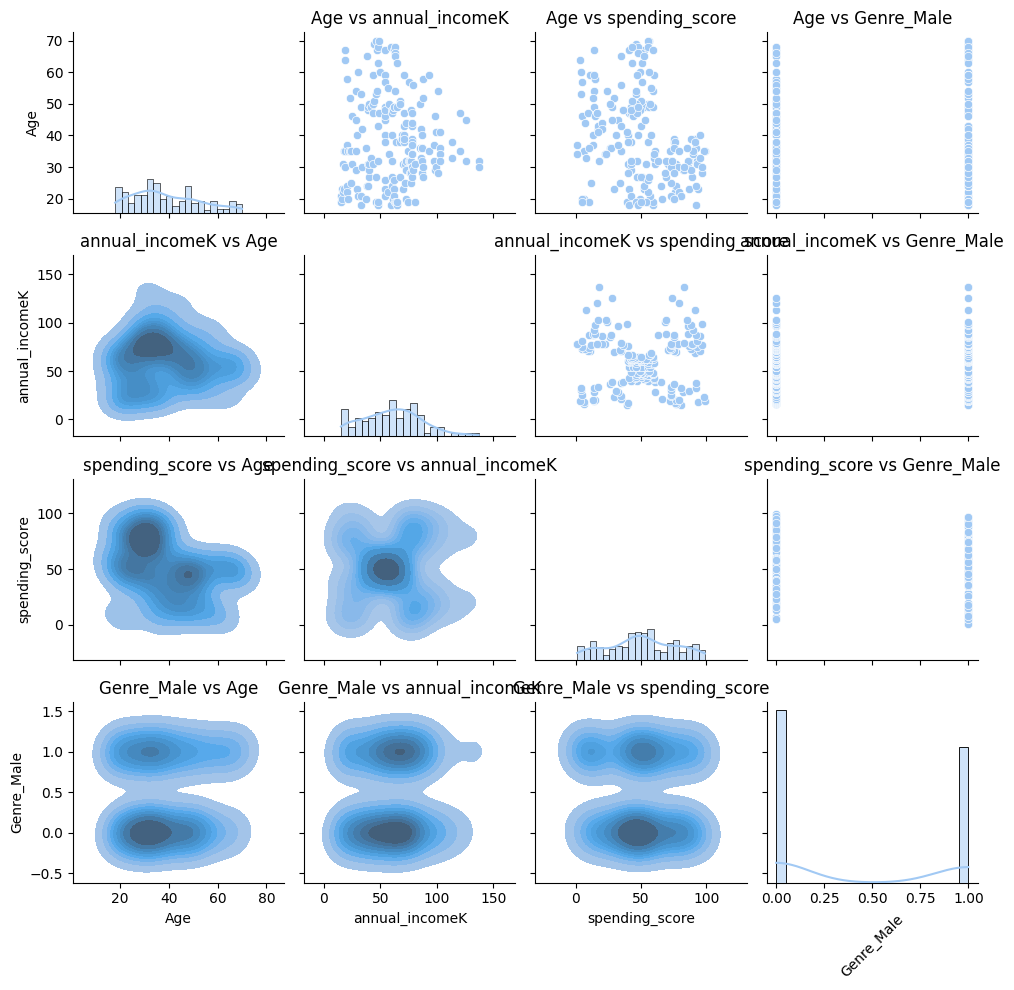

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the color palette for the plots
sns.set_palette("pastel")

# Get only the numerical columns from the dataset
numerical_columns = df.select_dtypes(include=['int64', 'uint8']).columns

# Create subplots using Seaborn's PairGrid
g = sns.PairGrid(df[numerical_columns])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True, bins=20)  # Adjust the 'bins' parameter for the histogram

# Add axis measurements on the diagonal KDE plots
for i, col in enumerate(numerical_columns):
    g.axes[i, i].set_xlabel(col)  # Set the column name as the x-axis label
    g.axes[i, i].set_ylabel(col)  # Set the column name as the y-axis label
    g.axes[i, i].xaxis.label.set_rotation(45)  # Rotate x-axis labels to avoid overlapping

# Add titles to the plots
for i in range(len(numerical_columns)):
    for j in range(len(numerical_columns)):
        if i != j:
            g.axes[i, j].set_title(f"{numerical_columns[i]} vs {numerical_columns[j]}")

# Adjust the aspect ratio of the subplots
g.fig.aspect = 1.2

# Set a tight layout to avoid overlapping headings
plt.tight_layout()

# Show the plot
plt.show()

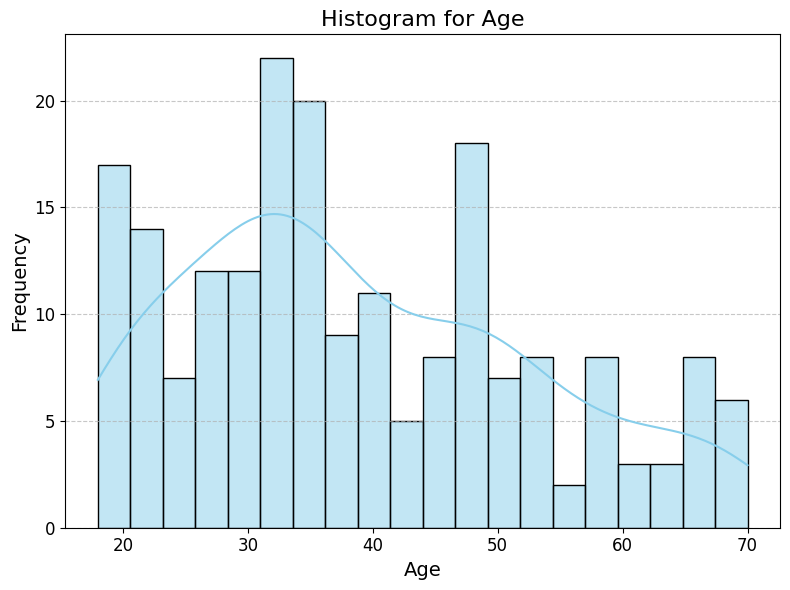

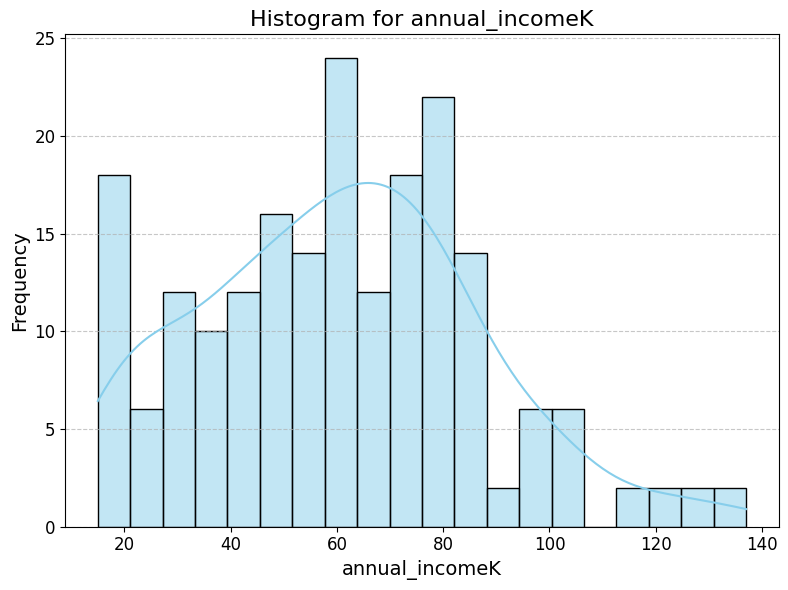

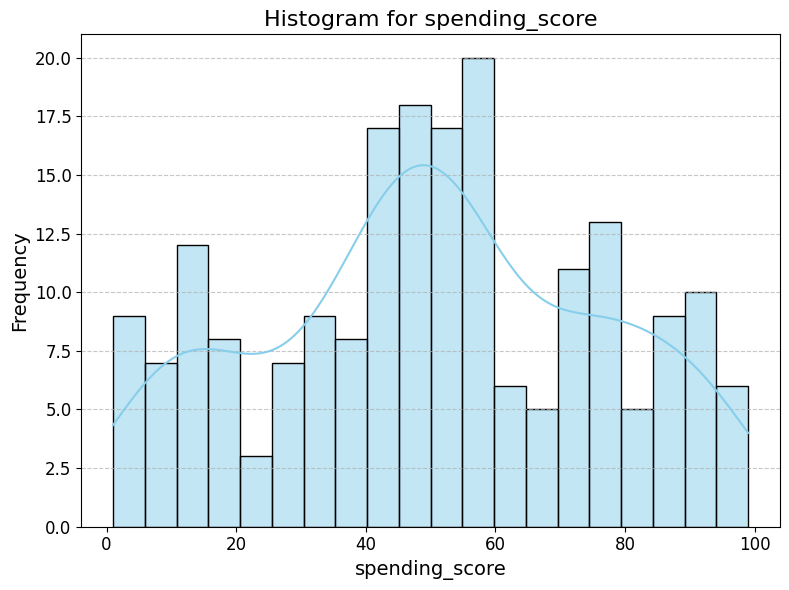

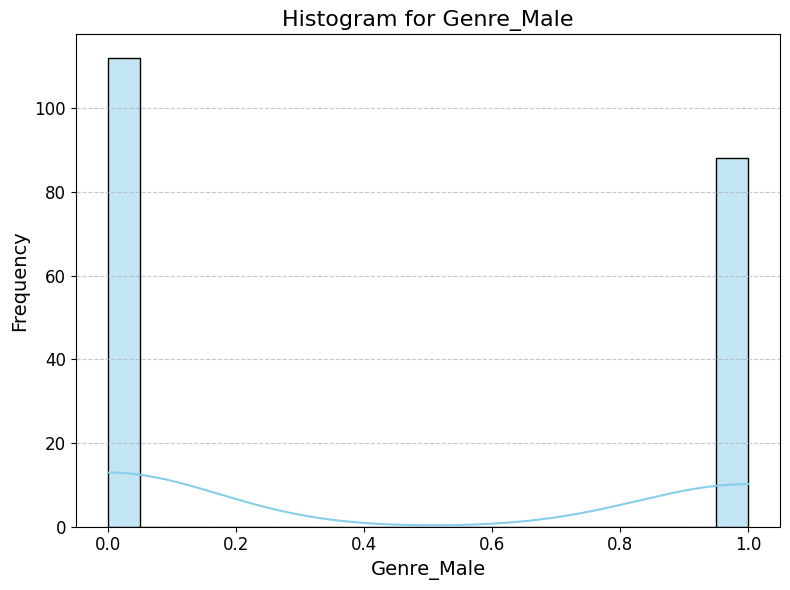

In [ ]:


# Set the color palette for the plots
sns.set_palette("pastel")

# Plot individual histograms for each column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))  # Set the figure size (width, height)
    sns.histplot(data=df, x=col, bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f"Histogram for {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
# Define the percentiles to calculate
percentiles_list = [1, 5, 10, 15, 25, 50, 75]

# Calculate percentiles for each column
percentiles_df = pd.DataFrame(data=percentiles_list, columns=['Percentile'])

for col in numerical_columns:
    percentiles = np.percentile(df[col], percentiles_list)
    percentiles_df[col] = percentiles

# Display the DataFrame with percentiles
percentiles_df

,Percentile,Age,annual_incomeK,spending_score,Genre_Male
0,1,18.00,15.99,2.98,0.0
1,5,19.00,19.00,6.00,0.0
2,10,21.00,23.90,13.00,0.0
3,15,23.00,29.85,16.85,0.0
4,25,28.75,41.50,34.75,0.0
5,50,36.00,61.50,50.00,0.0
6,75,49.00,78.00,73.00,1.0


Age Distribution: We can analyze the distribution of customers' ages to identify the most common age groups and any patterns in age demographics.
Insights: The majority of customers in the dataset fall within the age group of 30 to 35 years, followed by the age group of 48 to 50, and then the age group of 18 to 20. This suggests that the most significant proportion of customers are in their early to mid-thirties.

Annual Income Distribution: We can examine the distribution of customers' annual incomes to understand the income range of the majority of customers and any potential income segments.
INSIGHTS-Annual Salary Distribution: Most of the customers have an annual salary of 60k, followed by 80k, and then 20k. This indicates that the majority of customers have higher salaries, with 60k being the most common income level in the dataset.


Spending Score Analysis: We can explore the distribution of customers' spending scores to identify segments of high-spending and low-spending customers.
 INSIGHTS - The majority of customers have a spending score between 55 and 60, with a significant portion falling within the range of 40 to 60. This implies that a considerable number of customers spend moderately to fairly high amounts.

Gender Comparison: We can compare the number of male and female customers to understand the gender distribution and if one gender dominates the customer base.
 INSIGHTS - In the given dataset, there are 112 female customers and 88 male customers. This confirms that there are more female customers than male customers.

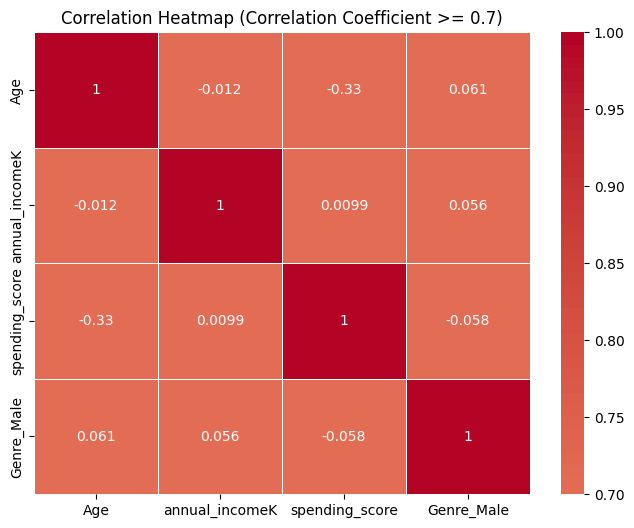

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0.7, vmax=1.0, center=0, linewidths=0.5)
plt.title("Correlation Heatmap (Correlation Coefficient >= 0.7)")
plt.show()

There isnt any strong linear correlation between the given features

The Hopkins statistic is used to assess the clustering tendency of a dataset. It measures the degree of clustering in the data by comparing the distribution of the data points with the distribution of randomly generated points. A higher Hopkins statistic value (closer to 1) indicates that the data is more suitable for clustering.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X, axis=0), np.amax(X, axis=0), d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        H = 0

    return H

# Applying Hopkins function to scaled_data
# Data Preprocessing - Scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
hopkinstatic = hopkins(scaled_data)
print("Hopkins Statistic:", hopkinstatic)


Hopkins Statistic: 0.7599482424898315


A Hopkins Statistic value of 0.7456230117407658 indicates a relatively strong clustering tendency in the data. Generally, a Hopkins Statistic closer to 1 suggests that the data has a higher tendency to form clusters, making it more suitable for clustering.

In this case, with a value of 0.7456230117407658, it suggests that the data has a reasonably good clustering structure.so we will move ahead with Clustre

clustering techniques

To determine the best clustering technique for a given dataset, we can compare multiple clustering algorithms and evaluate their performance using various metrics. In this example, we'll compare K-means, Birch, and Deep Learning (autoencoder-based clustering) techniques. We'll use the same dataset and features as provided earlier and evaluate their performance using the Silhouette Score as the clustering metric.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, Birch, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from keras.models import Model
from keras.layers import Input, Dense



# Evaluating K-means clustering
kmeans_silhouette = []
max_clusters = 10  # You can adjust this based on your requirements

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, clusters)
    kmeans_silhouette.append(silhouette_avg)

# Evaluating Birch clustering
birch_silhouette = []

for threshold in np.arange(0.1, 1.0, 0.1):
    birch = Birch(threshold=threshold, n_clusters=None)
    clusters = birch.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, clusters)
    birch_silhouette.append(silhouette_avg)

# Evaluating DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)
dbscan_silhouette = silhouette_score(scaled_data, dbscan_clusters)

# Evaluating Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_clusters = hierarchical.fit_predict(scaled_data)
hierarchical_silhouette = silhouette_score(scaled_data, hierarchical_clusters)

# Evaluating Deep Learning (Autoencoder-based) clustering
input_dim = scaled_data.shape[1]
encoding_dim = 2  # You can adjust this based on your requirements

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(scaled_data, scaled_data, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Create an encoder model to get the encoded data
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoded_data = encoder_model.predict(scaled_data)

autoencoder_clusters = KMeans(n_clusters=5, random_state=42).fit_predict(encoded_data)
autoencoder_silhouette = silhouette_score(encoded_data, autoencoder_clusters)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Clustering Technique': ['K-means', 'Birch', 'DBSCAN', 'Hierarchical', 'Deep Learning'],
    'Silhouette Score': [max(kmeans_silhouette), max(birch_silhouette), dbscan_silhouette, hierarchical_silhouette, autoencoder_silhouette]
})

print(results_df)


7/7 [==============================] - 0s 3ms/step
  Clustering Technique  Silhouette Score
0              K-means          0.420342
1                Birch          0.421490
2               DBSCAN          0.012015
3         Hierarchical          0.286994
4        Deep Learning          0.538464


Overall, based on the Silhouette Scores, the Deep Learning (Autoencoder-based) Clustering technique seems to be the most effective for this dataset, closely followed by Birch and K-means. However, it's important to note that the choice of clustering technique should also consider other factors such as the interpretability of results, computational efficiency, and domain-specific requirements. Additionally, it might be beneficial to explore other clustering algorithms and hyperparameter settings to further optimize the clustering results.

Deep Learning (Autoencoder-based) Clustering technique, despite its advantages and high Silhouette Score in some cases, also comes with certain constraints and challenges:

Computationally Expensive: Training deep learning models, especially autoencoders, can be computationally expensive, especially for large datasets and complex architectures. It may require substantial computational resources and time to achieve good results.

High Dimensionality: Autoencoders can struggle with high-dimensional data. As the number of features increases, the complexity of the autoencoder model also increases, and it may face challenges in capturing meaningful representations from such high-dimensional data.

Hyperparameter Tuning: Autoencoders have several hyperparameters, such as the number of layers, nodes per layer, learning rate, batch size, etc. Tuning these hyperparameters can be a challenging task and may require significant trial and error.

No Direct Control of Clusters: Autoencoders are unsupervised learning models, which means they don't directly optimize for clustering. Instead, they aim to minimize the reconstruction error, which may not directly correspond to the cluster quality. It can lead to suboptimal clustering results compared to traditional clustering algorithms explicitly designed for clustering.

Limited Interpretability: Deep learning models, including autoencoders, are often considered as "black-box" models. It can be challenging to interpret the learned representations and understand how the data is being clustered.

Overfitting: Autoencoders can be prone to overfitting, especially when dealing with a small amount of data or complex architectures. Proper regularization techniques need to be applied to mitigate overfitting issues.

Dependency on Data Quality: Deep learning models, in general, are highly dependent on the quality and quantity of data. If the dataset is noisy or contains outliers, it may negatively impact the clustering performance.

Scalability: While deep learning models can be powerful, they might not be the most scalable solution for clustering very large datasets compared to some traditional clustering algorithms.

Data Preprocessing: Preprocessing the data and choosing the appropriate scaling and normalization methods can significantly impact the clustering performance of autoencoders.

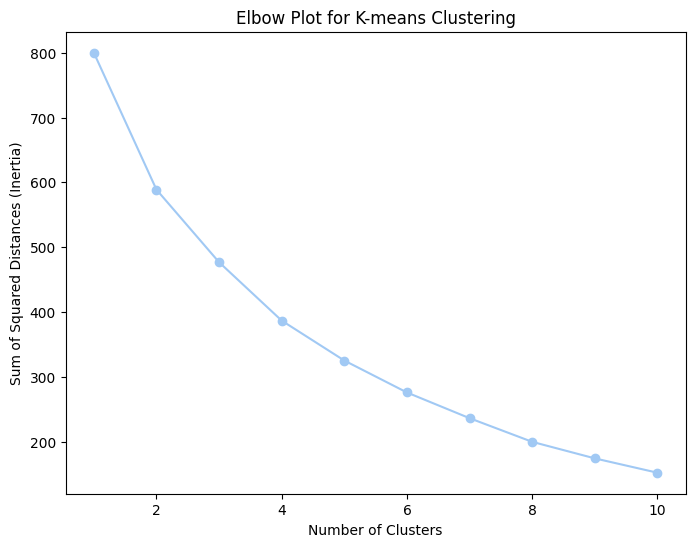

In [ ]:

from sklearn.cluster import KMeans


# Data Preprocessing - Scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)

# Finding the optimal number of clusters using the elbow method
inertia = []
max_clusters = 10  # You can adjust this based on your requirements

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Plot for K-means Clustering')
plt.show()


As per the Elbow Plot we can take 6 or 7 clusters with a considerable less wss score.

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Num_Clusters', 'Silhouette_Score'])

# Finding the optimal number of clusters using the silhouette score
max_clusters = 10  # You can adjust this based on your requirements

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, clusters)
    results_df = results_df.append({'Num_Clusters': k, 'Silhouette_Score': silhouette_avg}, ignore_index=True)

results_df


,Num_Clusters,Silhouette_Score
0,2.0,0.251815
1,3.0,0.259513
2,4.0,0.301624
3,5.0,0.317091
4,6.0,0.333628
5,7.0,0.357377
6,8.0,0.387397
7,9.0,0.402252
8,10.0,0.420342


Insights:

As the number of clusters increases, the Silhouette Score generally improves, indicating that more clusters are leading to better-defined clusters.
The Silhouette Score starts relatively low for 2 clusters (0.251815) and increases gradually as the number of clusters grows.
The Silhouette Score continues to improve significantly until 7 clusters (0.357377), where it shows a notable increase compared to previous clusters.
Beyond 7 clusters, the Silhouette Score continues to increase, but the rate of improvement slows down slightly.
Based on the Silhouette Scores, the optimal number of clusters can be determined. The highest Silhouette Score is achieved when using 10 clusters (Silhouette_Score: 0.420342). However, the decision on the optimal number of clusters should be based on both the Silhouette Score and domain knowledge. For example, you may choose a smaller number of clusters if interpretability and simplicity are important, or you may choose more clusters if fine-grained segmentation is needed.

It's essential to consider the business context and objectives when determining the number of clusters for your specific use case. The Silhouette Score provides valuable information, but it should be combined with other clustering evaluation techniques and domain expertise for a comprehensive clustering solution.

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Create a new DataFrame to store the cluster labels
df_with_labels = df.copy()
df_with_labels['Cluster_Labels'] = cluster_labels

# Display the DataFrame with cluster labels
df_with_labels

,Age,annual_incomeK,spending_score,Genre_Male,Cluster_Labels
0,19,15,39,1,3
1,21,15,81,1,3
2,20,16,6,0,2
3,23,16,77,0,2
4,31,17,40,0,2
...,...,...,...,...,...
195,35,120,79,0,1
196,45,126,28,0,4
197,32,126,74,1,5
198,32,137,18,1,4


PROFILE THE CLUSTERS
To profile the clusters, we calculate the cluster statistics for each cluster. This involves analyzing the characteristics of data points within each cluster, such as the mean, median, and standard deviation of each feature

In [ ]:

# Profile the clusters - Calculate cluster statistics
def mode_value(x):
    return x.mode().iloc[0]

# Profile the clusters - Calculate cluster statistics
cluster_profiles = df_with_labels.groupby('Cluster_Labels').agg({
    'Age': ['mean', 'median', 'std'],
    'annual_incomeK': ['mean', 'median', 'std'],
    'spending_score': ['mean', 'median', 'std', 'count'],
    'Genre_Male': [mode_value]
})

# Rename columns for clarity
cluster_profiles.columns = [
    'Age Mean', 'Age Median', 'Age Std',
    'Income Mean', 'Income Median', 'Income Std',
    'Spending Score Mean', 'Spending Score Median', 'Spending Score Std', 'Cluster Size',
    'Male Proportion'
]
# Display the cluster profiles
cluster_profiles


,Age Mean,Age Median,Age Std,Income Mean,Income Median,Income Std,Spending Score Mean,Spending Score Median,Spending Score Std,Cluster Size,Male Proportion
Cluster_Labels,,,,,,,,,,,
0,56.727273,58.0,8.903204,53.666667,54.0,19.290002,35.878788,42.0,18.131047,33,1
1,32.545455,32.0,3.432718,85.272727,78.5,14.286796,80.590909,81.0,9.158182,22,0
2,25.945946,24.0,5.152917,42.216216,40.0,18.739642,57.459459,54.0,20.539386,37,0
3,25.250000,24.0,6.860409,41.250000,44.0,17.192643,60.916667,57.5,15.838634,24,1
4,37.769231,38.5,9.369344,91.461538,87.0,17.351036,16.115385,16.0,9.339494,26,0
5,33.277778,32.0,4.389902,87.111111,82.5,18.929867,82.666667,85.5,11.103788,18,1
6,50.875000,49.5,8.904587,49.175000,49.5,15.123233,39.700000,43.5,15.857054,40,0


Age Segmentation: The data has been divided into clusters based on age. Each cluster has a distinct age profile. For example, Cluster 0 has an average age of approximately 57 years, while Cluster 3 has an average age of about 25 years. The age median provides an insight into the central tendency of the ages within each cluster.

Income and Spending Score: The clusters show variations in income and spending score patterns. Cluster 4 has the highest average income (around $91,461) and spending score (approximately 16), suggesting a high-income, low-spending behavior. On the other hand, Cluster 1 has an average income of about $85,273 and a significantly higher spending score of approximately 81, indicating higher spending habits.

Gender Distribution: The "Male Proportion" column indicates the dominant gender within each cluster. For example, Cluster 0 and Cluster 3 are predominantly male-dominated, while Cluster 1 and Cluster 5 are predominantly female-dominated.

Cluster Size: The "Cluster Size" column represents the number of data points in each cluster. This information can be helpful in understanding the distribution of data points among clusters and their relative significance.

Income Variability: The standard deviation of income in each cluster (Income Std) gives an idea of the income variability within the cluster. Higher standard deviation indicates more diverse income levels, while lower standard deviation suggests income levels are more closely grouped.

Spending Score Variability: Similar to income, the standard deviation of spending score (Spending Score Std) provides insights into the variability of spending habits within each cluster.

Cluster Representation: Some clusters (e.g., Cluster 2 and Cluster 3) have relatively smaller sizes, while others (e.g., Cluster 0 and Cluster 6) have larger sizes. The representation of clusters might have implications when interpreting the results and making data-driven decisions.

**ACTIONABLE INSIGHTS**


These insights derived from the clustering analysis can be highly valuable for targeted marketing, product recommendations, and customer retention strategies. Let's explore how each insight can be leveraged for these purposes:

Age Segmentation: Understanding the distinct age profiles within each cluster allows businesses to customize their marketing strategies and product offerings to cater to the preferences and needs of different age groups. For example, products and advertisements targeting younger customers can be tailored to appeal to Cluster 3 (average age of about 25 years), while products for older customers can be designed to resonate with Cluster 0 (average age of approximately 57 years).

Income and Spending Score: Identifying clusters with higher income and lower spending behavior (like Cluster 4) may indicate a potential market for luxury or high-end products that appeal to customers with higher financial capacity but conservative spending habits. On the other hand, clusters with higher spending scores (e.g., Cluster 1) may be targeted for promotional offers, loyalty programs, and product recommendations to encourage repeat purchases and brand loyalty.

Gender Distribution: Recognizing the dominant gender in each cluster helps businesses tailor their marketing messages and product assortments to align with gender preferences. For example, Cluster 0 and Cluster 3, which are predominantly male-dominated, may benefit from marketing campaigns and products that cater to male interests and preferences.

Cluster Size: Paying attention to the size of each cluster is essential for resource allocation in marketing and customer service. Larger clusters might have more impact on business performance, warranting more attention in terms of marketing efforts and customer support.

Income and Spending Variability: Understanding the income and spending score variability within each cluster can guide pricing strategies and product offerings. For clusters with higher income and spending variability, businesses can offer a wide range of products at different price points to cater to diverse customer preferences.